# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Task 29

In [ ]:
def create_dataset(n):
  return [(i, 2 * i) for i in range(n)]

def initialize_weights(x, y):
  return np.random.uniform(x, y)

#create_dataset(10)
#initialize_weights(0, 100)

# Task 30

In [ ]:
np.random.seed(42)

def calculate_loss(weigths, dataset):
  errors = [(weigths * x - y) ** 2 for x, y in dataset]
  return np.mean(errors)



dataset = create_dataset(6)
w = initialize_weights(0, 10)

print(w)

loss = calculate_loss(w, dataset)
loss_w_plus_002 = calculate_loss(w + 0.002, dataset)
loss_w_plus_001 = calculate_loss(w + 0.001, dataset)
loss_w_minus_001 = calculate_loss(w - 0.001, dataset)
loss_w_minus_002 = calculate_loss(w - 0.002, dataset)


print(f'MSE: {calculate_loss(w, dataset)}')
print(f'MSE (w + 0.002): {calculate_loss(w + 0.002, dataset)}')
print(f'MSE (w + 0.001): {calculate_loss(w + 0.001, dataset)}')
print(f'MSE (w - 0.001): {calculate_loss(w - 0.001, dataset)}')
print(f'MSE (w - 0.002): {calculate_loss(w - 0.002, dataset)}')


# I noticed that the loss function would return lowwer resul if we reduce weigths and increase if we increase it
# w = 3.745 and it explains the behaviour as we aim to make it 2

3.745401188473625
MSE: 27.92556532998047
MSE (w + 0.002): 27.989600040224502
MSE (w + 0.001): 27.957573518435822
MSE (w - 0.001): 27.893575474858455
MSE (w - 0.002): 27.86160395306978


# Task 31

In [ ]:
np.random.seed(42)
def approximate_derivative(w, dataset, eps=0.00001):
    return (calculate_loss(w + eps, dataset) - calculate_loss(w, dataset)) / eps



w = initialize_weights(0, 10)
learning_rate = 0.001


for epoch in range(10):
  loss_before = calculate_loss(w, dataset)
  L = approximate_derivative(w, dataset)
  w -= learning_rate * L
  loss_after = calculate_loss(w, dataset)
  print(f'Epoch {epoch + 1}: Loss Before: {round(loss_before,5)}, Loss After: {round(loss_after,5)}, w: {round(w,5)}')


Epoch 1: Loss Before: 27.92557, Loss After: 26.91101, w: 3.7134
Epoch 2: Loss Before: 26.91101, Loss After: 25.93332, w: 3.68199
Epoch 3: Loss Before: 25.93332, Loss After: 24.99114, w: 3.65115
Epoch 4: Loss Before: 24.99114, Loss After: 24.0832, w: 3.62088
Epoch 5: Loss Before: 24.0832, Loss After: 23.20824, w: 3.59117
Epoch 6: Loss Before: 23.20824, Loss After: 22.36507, w: 3.56199
Epoch 7: Loss Before: 22.36507, Loss After: 21.55253, w: 3.53336
Epoch 8: Loss Before: 21.55253, Loss After: 20.76951, w: 3.50525
Epoch 9: Loss Before: 20.76951, Loss After: 20.01494, w: 3.47765
Epoch 10: Loss Before: 20.01494, Loss After: 19.28778, w: 3.45056


# Task 32

In [ ]:
w = initialize_weights(0, 10)
print(f'Loss Before: { round(calculate_loss(w, dataset) ,5) }')

for epoch in range(500):
  L = approximate_derivative(w, dataset)
  w -= learning_rate * L


print(f'Loss After: { round(calculate_loss(w, dataset) ,5) }')

Loss Before: 516.60764
Loss After: 0.0


# Task 33

In [ ]:
# y = w1 * x1 + w2 * x2
# Two parameters w1 and w2


def create_and_dataset():
  return [(0, 0, 0), (0, 1, 0), (1, 0, 0), (1, 1, 1)]

def create_or_dataset():
  return [(0, 0, 0), (0, 1, 1), (1, 0, 1), (1, 1, 1)]

def initialize_weights():
  return np.random.uniform(0, 1, size=2)

def calculate_loss(weights, dataset):
  errors = [(weights[0] * x1 + weights[1] * x2 - y) ** 2 for x1, x2, y in dataset]
  return np.mean(errors)

def approximate_derivative(weights, dataset, epsilon=0.00001):
  gradient = np.zeros_like(weights)
  for i in range(2):
    temp_weigth = weights.copy()
    temp_weigth[i] += epsilon
    gradient[i] = (calculate_loss(temp_weigth, dataset) - calculate_loss(weights, dataset)) / epsilon
  return gradient

def train(weights, dataset, learning_rate, epochs):
  print(f"Loss before: {calculate_loss(weights, dataset)}")

  for epoch in range(epochs):
    gradient = approximate_derivative(weights, dataset)
    weights -= learning_rate * gradient

  print(f"Loss after: {calculate_loss(weights, dataset)}\n")
  return weights


w_and = initialize_weights()
w_or = initialize_weights()
learning_rate = 0.001

w_and_trained = train(w_and, create_and_dataset(), learning_rate, 100000)
w_or_trained = train(w_or, create_or_dataset(), learning_rate, 100000)


print("AND Gate:")
for x1, x2, y_pred in [(x1, x2, w_and_trained[0] * x1 + w_and_trained[1] * x2) for x1, x2, _ in create_and_dataset()]:
  print(f'({x1} AND {x2}) -> Predicted: {round(y_pred ,2)}')

print("\nOR Gate:")
for x1, x2, y_pred in [(x1, x2, w_or_trained[0] * x1 + w_or_trained[1] * x2) for x1, x2, _ in create_or_dataset()]:
  print(f'({x1} OR {x2}) -> Predicted: {round(y_pred, 2)}')

# This task can be considered easy yet the confdence levels are not great they shoud be very close to 0 or 1

Loss before: 0.25088453459374
Loss after: 0.08333333335000001

Loss before: 0.4744939189812371
Loss after: 0.08333333335000001

AND Gate:
(0 AND 0) -> Predicted: 0.0
(0 AND 1) -> Predicted: 0.33
(1 AND 0) -> Predicted: 0.33
(1 AND 1) -> Predicted: 0.67

OR Gate:
(0 OR 0) -> Predicted: 0.0
(0 OR 1) -> Predicted: 0.67
(1 OR 0) -> Predicted: 0.67
(1 OR 1) -> Predicted: 1.33


# Task 34

In [ ]:
# y = w1 * x1 + w2 * x2 + b
# Tree parameters w1, w2 and b

def initialize_weights():
  return np.random.uniform(0, 1, size=3)

def calculate_loss(weights, dataset):
  errors = [(weights[0] * x1 + weights[1] * x2 + weights[2] - y) ** 2 for x1, x2, y in dataset]
  return np.mean(errors)

def approximate_derivative(weights, dataset, epsilon=0.00001):
  gradient = np.zeros_like(weights)
  for i in range(3):
    temp_weight = weights.copy()
    temp_weight[i] += epsilon
    gradient[i] = (calculate_loss(temp_weight, dataset) - calculate_loss(weights, dataset)) / epsilon
  return gradient


w_and = initialize_weights()
w_or = initialize_weights()
learning_rate = 0.001

w_and_trained = train(w_and, create_and_dataset(), learning_rate, 100000)
w_or_trained = train(w_or, create_or_dataset(), learning_rate, 100000)

print("AND Gate:")
for x1, x2, y_pred in [(x1, x2, w_and_trained[0] * x1 + w_and_trained[1] * x2 + w_and_trained[2]) for x1, x2, _ in create_and_dataset()]:
  print(f'({x1} AND {x2}) -> Predicted: {round(y_pred ,2)}')

print("\nOR Gate:")
for x1, x2, y_pred in [(x1, x2, w_or_trained[0] * x1 + w_or_trained[1] * x2 + w_or_trained[2]) for x1, x2, _ in create_or_dataset()]:
  print(f'({x1} OR {x2}) -> Predicted: {round(y_pred, 2)}')


# Bias increased the confidence level

Loss before: 0.8062110181659112
Loss after: 0.06250000002499999

Loss before: 0.4721178504408621
Loss after: 0.062500000025

AND Gate:
(0 AND 0) -> Predicted: -0.25
(0 AND 1) -> Predicted: 0.25
(1 AND 0) -> Predicted: 0.25
(1 AND 1) -> Predicted: 0.75

OR Gate:
(0 OR 0) -> Predicted: 0.25
(0 OR 1) -> Predicted: 0.75
(1 OR 0) -> Predicted: 0.75
(1 OR 1) -> Predicted: 1.25


# Task 35

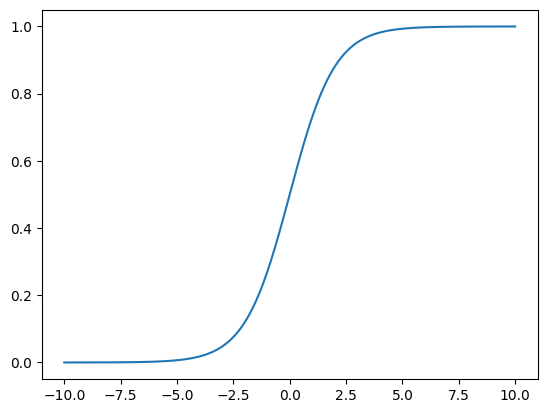

In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

x = np.linspace(-10, 10, 10000)
y = sigmoid(x)

plt.plot(x, y)
plt.show()

# Task 36

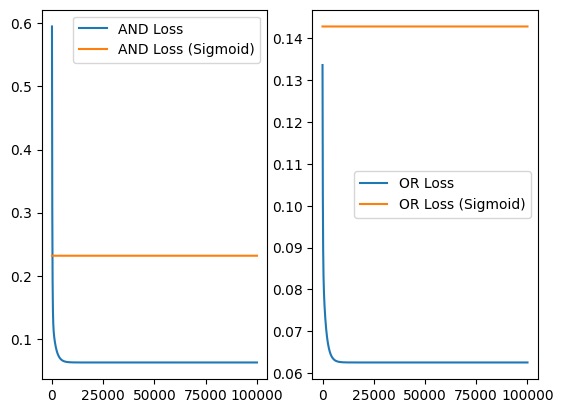

In [ ]:
def calculate_loss_sigmoid(weights, dataset):
  errors = []
  for x1, x2, y in dataset:
    loss = (sigmoid(weights[0] * x1 + weights[1] * x2 + weights[2]) - y) ** 2
    errors.append(loss)
  return np.mean(errors)

def approximate_derivative_sigmoid(weights, dataset, epsilon=0.00001):
  gradient = np.zeros_like(weights)
  for i in range(3):
    temp_weight = weights.copy()
    temp_weight[i] += epsilon
    gradient[i] = (calculate_loss_sigmoid(temp_weight, dataset) - calculate_loss_sigmoid(weights, dataset)) / epsilon
  return gradient


def train_sigmoid(weights, dataset, learning_rate, epochs):
  loss_progress = []
  for epoch in range(epochs):
    gradient = approximate_derivative(weights, dataset)
    weights -= learning_rate * gradient

    loss_progress.append(calculate_loss_sigmoid(weights, dataset))

  return weights, loss_progress

def train(weights, dataset, learning_rate, epochs):
  loss_progress = []
  for epoch in range(epochs):
    gradient = approximate_derivative(weights, dataset)
    weights -= learning_rate * gradient

    loss_progress.append(calculate_loss(weights, dataset))

  return weights, loss_progress


w_and = initialize_weights()
w_or = initialize_weights()

w_and_trained , loss_and = train(w_and, create_and_dataset(), learning_rate, 100000)
w_and_trained_sigmoid , loss_and_sigmoid = train_sigmoid(w_and, create_and_dataset(), learning_rate, 100000)

w_or_trained , loss_or = train(w_or, create_or_dataset(), learning_rate, 100000)
w_or_trained_sigmoid , loss_or_sigmoid = train_sigmoid(w_or, create_or_dataset(), learning_rate, 100000)

_ , axes = plt.subplots(1, 2)

axes[0].plot(range(len(loss_and)), loss_and, label='AND Loss')
axes[0].plot(range(len(loss_and_sigmoid)), loss_and_sigmoid, label='AND Loss (Sigmoid)')
axes[0].legend()

axes[1].plot(range(len(loss_or)), loss_or, label='OR Loss')
axes[1].plot(range(len(loss_or_sigmoid)), loss_or_sigmoid, label='OR Loss (Sigmoid)')
axes[1].legend()

plt.show()


# Task 37

In [ ]:
def sigmoid(x): # reused
  return 1 / (1 + np.exp(-x))

def create_nand_dataset():
  return [(0, 0, 1), (0, 1, 1), (1, 0, 1), (1, 1, 0)]

def initialize_weights(): # reused
  return np.random.uniform(0, 1, size=3)

def calculate_loss(weights, dataset): # reused
  errors = []
  for x1, x2, y in dataset:
    loss = (sigmoid(weights[0] * x1 + weights[1] * x2 + weights[2]) - y) ** 2
    errors.append(loss)
  return np.mean(errors)

def approximate_derivative(weights, dataset, epsilon=0.001): # reused
  gradient = np.zeros_like(weights)
  for i in range(3):
    temp_weights = weights.copy()
    temp_weights[i] += epsilon
    gradient[i] = (calculate_loss(temp_weights, dataset) - calculate_loss(weights, dataset)) / epsilon
  return gradient

def train(weights, dataset, learning_rate, epochs):
  print(f"Loss before: {calculate_loss(weights, dataset)}")

  for epoch in range(epochs):
    gradient = approximate_derivative(weights, dataset)
    weights -= learning_rate * gradient

  print(f"Loss after: {calculate_loss(weights, dataset)}\n")
  return weights


w_nand = initialize_weights()
learning_rate = 0.1 # In order to get decent results I had to use huge amount of epochs , so I increased the learning rate sligthly

w_nand_trained = train(w_nand, create_nand_dataset(), learning_rate, 1000)

print("NAND Gate:")
for x1, x2, y_pred in [(x1, x2, w_nand_trained[0] * x1 + w_nand_trained[1] * x2 + w_nand_trained[2]) for x1, x2, _ in create_nand_dataset()]:
  print(f'({x1} NAND {x2}) -> Predicted: {round(y_pred ,2)}')

Loss before: 0.25153859080025703
Loss after: 0.06459021560496542

NAND Gate:
(0 NAND 0) -> Predicted: 2.71
(0 NAND 1) -> Predicted: 1.01
(1 NAND 0) -> Predicted: 1.02
(1 NAND 1) -> Predicted: -0.68


# Task 38

In [12]:
class XOR:
  def __init__(self):
    self.parameters = np.random.uniform(-1, 1, 9)
    self.dataset = [(0, 0, 0), (0, 1, 1), (1, 0, 1), (1, 1, 0)]


  def sigmoid(self, x):
    return 1 / (1 + np.exp(-x))

  def calculate_loss(self):
    errors = []
    for x1, x2, y in self.dataset:
      s = self.forward(x1, x2)
      loss = (s - y) ** 2
      errors.append(loss)
    return np.average(errors)

  def aproximate_derivative(self, epsilon=0.1):
    gradient = np.zeros_like(self.parameters)
    curr_loss = self.calculate_loss()
    for i in range(9):
      store_parameter = self.parameters[i]
      self.parameters[i] += epsilon
      new_loss = self.calculate_loss()
      gradient[i] = (new_loss - curr_loss) / epsilon
      self.parameters[i] = store_parameter
    return gradient

  def train(self, epochs=100000, learning_rate=0.1):
    #print(f"Loss before: {self.calculate_loss()}")
    for _ in range(epochs):
      gradient = self.aproximate_derivative()
      self.parameters -= learning_rate * gradient
    #print(f"Loss after: {self.calculate_loss()}\n")
    return self.parameters

  def predict(self, x1, x2):
    forwarded = self.forward(x1, x2)
    return (forwarded >= 0.5).astype(int)

  def forward(self, x1, x2):
    n1 = self.parameters[0] * x1 + self.parameters[1] * x2 + self.parameters[2]
    s1 = self.sigmoid(n1)
    n2 = self.parameters[3] * x1 + self.parameters[4] * x2 + self.parameters[5]
    s2 = self.sigmoid(n2)
    n3 = self.parameters[6] * s1 + self.parameters[7] * s2 + self.parameters[8]
    return self.sigmoid(n3)

  def n1_forward(self, x1, x2):
    s = self.parameters[0] * x1 + self.parameters[1] * x2 + self.parameters[2]
    return self.sigmoid(s)

  def n2_forward(self, x1, x2):
    s = self.parameters[3] * x1 + self.parameters[4] * x2 + self.parameters[5]
    return self.sigmoid(s)

  def n3_forward(self, x1, x2):
    s = self.parameters[6] * x1 + self.parameters[7] * x2 + self.parameters[8]
    return self.sigmoid(s)



xor = XOR()
xor.train()
print("XOR Gate:")
for x1, x2, y_pred in [(x1, x2, xor.predict(x1, x2)) for x1, x2, _ in xor.dataset]:
  print(f'({x1} XOR {x2}) -> Predicted: {round(y_pred ,2)}')

print("\nXOR forward:")
for x1, x2, y_pred in [(x1, x2, xor.forward(x1, x2)) for x1, x2, _ in xor.dataset]:
  print(f'({x1} XOR {x2}) -> Forward: {round(y_pred ,2)}')

print("\nNeuron 1:")
for x1, x2, y_pred in [(x1, x2, xor.n1_forward(x1, x2)) for x1, x2, _ in xor.dataset]:
  print(f'({x1} , {x2}) -> Forward: {round(y_pred ,2)}')

print("\nNeuron 2:")
for x1, x2, y_pred in [(x1, x2, xor.n2_forward(x1, x2)) for x1, x2, _ in xor.dataset]:
  print(f'({x1} , {x2}) -> Forward: {round(y_pred ,2)}')

print("\nNeuron 3:")
for x1, x2, y_pred in [(x1, x2, xor.n3_forward(x1, x2)) for x1, x2, _ in xor.dataset]:
  print(f'({x1} , {x2}) -> Forward: {round(y_pred ,2)}')


XOR Gate:
(0 XOR 0) -> Predicted: 0
(0 XOR 1) -> Predicted: 1
(1 XOR 0) -> Predicted: 1
(1 XOR 1) -> Predicted: 0

XOR forward:
(0 XOR 0) -> Forward: 0.02
(0 XOR 1) -> Forward: 0.98
(1 XOR 0) -> Forward: 0.98
(1 XOR 1) -> Forward: 0.02

Neuron 1:
(0 , 0) -> Forward: 0.06
(0 , 1) -> Forward: 0.97
(1 , 0) -> Forward: 0.97
(1 , 1) -> Forward: 1.0

Neuron 2:
(0 , 0) -> Forward: 0.0
(0 , 1) -> Forward: 0.06
(1 , 0) -> Forward: 0.06
(1 , 1) -> Forward: 0.87

Neuron 3:
(0 , 0) -> Forward: 0.01
(0 , 1) -> Forward: 0.0
(1 , 0) -> Forward: 0.99
(1 , 1) -> Forward: 0.0
